In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline



In [2]:
df = pd.read_csv('application_data.csv')
columns_desc = pd.read_csv('columns_description.csv')

In [3]:
print(f'Shape of Data: {df.shape}')
cat_columns = df.select_dtypes(include=[object]).columns
num_columns = df.select_dtypes(include=[int, float]).columns
print(f'Number of Categorical Columns: {len(cat_columns)} \nNumerical Columns: {len(num_columns)}')
df.describe()

Shape of Data: (307511, 122)
Number of Categorical Columns: 16 
Numerical Columns: 106


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [4]:
most_null_columns = df.isnull().sum().sort_values(ascending=False)
gt_5_percent = sum(most_null_columns > df.shape[0] * 0.05)
print(f'Number of columns with missing data greater than 5% of the entire dataset: {gt_5_percent} \n')
print(list(most_null_columns))
print()
print(list(most_null_columns.keys()))

Number of columns with missing data greater than 5% of the entire dataset: 57 

[214865, 214865, 214865, 213514, 213514, 213514, 210295, 210199, 210199, 210199, 208642, 208642, 208642, 204488, 204488, 204488, 202929, 182590, 182590, 182590, 179943, 179943, 179943, 173378, 169682, 169682, 169682, 163891, 163891, 163891, 156341, 156061, 156061, 156061, 154828, 154828, 154828, 154350, 154350, 154350, 154297, 153020, 153020, 153020, 150007, 150007, 150007, 148431, 145755, 96391, 60965, 41519, 41519, 41519, 41519, 41519, 41519, 1292, 1021, 1021, 1021, 1021, 660, 278, 12, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MEDI', '

TARGET
0         0.919271
dtype: float64
TARGET
1         0.080729
dtype: float64


<AxesSubplot:xlabel='TARGET'>

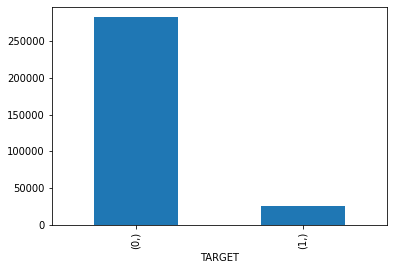

In [5]:
target_values = df[['TARGET']].value_counts()

print(target_values[0] / df.shape[0])
print(target_values[1] / df.shape[0])
target_values.plot.bar()

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64


<AxesSubplot:>

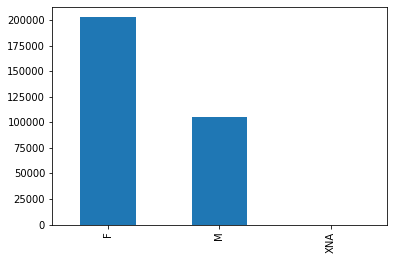

In [6]:
print(df['CODE_GENDER'].value_counts() / df.shape[0])
df['CODE_GENDER'].value_counts().plot.bar()

F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64


<AxesSubplot:>

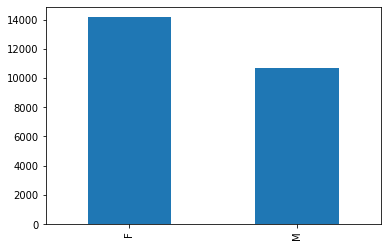

In [7]:
print(df[df['TARGET'] == 1]['CODE_GENDER'].value_counts() / df[df['TARGET'] == 1].shape[0])
df[df['TARGET'] == 1]['CODE_GENDER'].value_counts().plot.bar()

In [8]:
print(df[num_columns].abs().apply(lambda x: x.corr(df.TARGET)).sort_values().to_string())

EXT_SOURCE_3                   -0.178919
EXT_SOURCE_2                   -0.160472
EXT_SOURCE_1                   -0.155317
DAYS_BIRTH                     -0.078239
DAYS_LAST_PHONE_CHANGE         -0.055218
DAYS_ID_PUBLISH                -0.051457
DAYS_EMPLOYED                  -0.047046
FLOORSMAX_AVG                  -0.044003
FLOORSMAX_MEDI                 -0.043768
FLOORSMAX_MODE                 -0.043226
DAYS_REGISTRATION              -0.041975
AMT_GOODS_PRICE                -0.039645
REGION_POPULATION_RELATIVE     -0.037227
ELEVATORS_AVG                  -0.034199
ELEVATORS_MEDI                 -0.033863
FLOORSMIN_AVG                  -0.033614
FLOORSMIN_MEDI                 -0.033394
LIVINGAREA_AVG                 -0.032997
LIVINGAREA_MEDI                -0.032739
FLOORSMIN_MODE                 -0.032698
TOTALAREA_MODE                 -0.032596
ELEVATORS_MODE                 -0.032131
LIVINGAREA_MODE                -0.030685
AMT_CREDIT                     -0.030369
APARTMENTS_AVG  

In [9]:
categorical_variables = pd.get_dummies(df[cat_columns], drop_first=True)
print(categorical_variables.apply(lambda x: x.corr(df.TARGET)).sort_values().to_string())

NAME_EDUCATION_TYPE_Higher education                -0.056593
NAME_INCOME_TYPE_Pensioner                          -0.046209
ORGANIZATION_TYPE_XNA                               -0.045987
WALLSMATERIAL_MODE_Panel                            -0.033119
NAME_CONTRACT_TYPE_Revolving loans                  -0.030896
NAME_HOUSING_TYPE_House / apartment                 -0.028555
NAME_FAMILY_STATUS_Married                          -0.025043
NAME_INCOME_TYPE_State servant                      -0.023447
FONDKAPREMONT_MODE_reg oper account                 -0.022587
FLAG_OWN_CAR_Y                                      -0.021851
OCCUPATION_TYPE_Core staff                          -0.020378
NAME_FAMILY_STATUS_Widow                            -0.019394
OCCUPATION_TYPE_Managers                            -0.018648
OCCUPATION_TYPE_High skill tech staff               -0.013766
ORGANIZATION_TYPE_School                            -0.013671
WALLSMATERIAL_MODE_Stone, brick                     -0.012657
NAME_INC

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


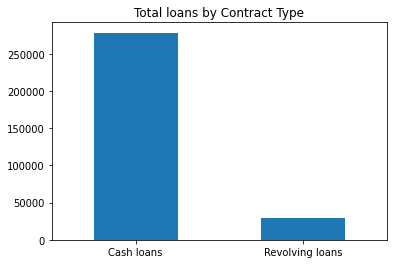

In [10]:
print(df['NAME_CONTRACT_TYPE'].value_counts())
df['NAME_CONTRACT_TYPE'].value_counts().plot.bar(rot=0, title='Total loans by Contract Type')
fig = df['NAME_CONTRACT_TYPE'].value_counts().plot.bar(rot=0,title='Total loans by Contract Type').get_figure()
fig.savefig('loan_type_plot.png')

Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64


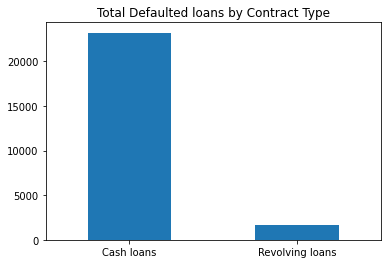

In [11]:
defaulted_df = df[df['TARGET'] == 1]
print(defaulted_df['NAME_CONTRACT_TYPE'].value_counts())
defaulted_df['NAME_CONTRACT_TYPE'].value_counts().plot.bar(rot=0)
fig = defaulted_df['NAME_CONTRACT_TYPE'].value_counts().plot.bar(rot=0, title='Total Defaulted loans by Contract Type').get_figure()
fig.savefig('default_loan_type_plot.png')

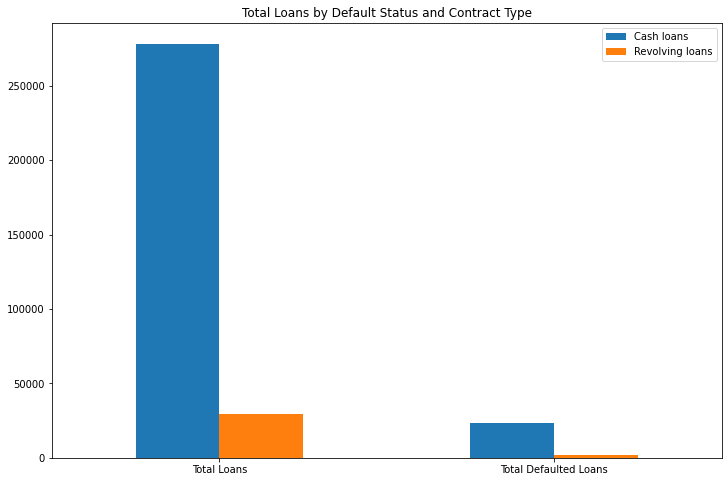

In [12]:
bar_plot = pd.concat(
    [df.rename(columns={"NAME_CONTRACT_TYPE": "Total Loans",})['Total Loans'].value_counts().to_frame().transpose(),
     df.rename(columns={"NAME_CONTRACT_TYPE": "Total Defaulted Loans",})[df['TARGET'] == 1]['Total Defaulted Loans'].value_counts().to_frame().transpose(),]
).plot.bar(rot=0, title='Total Loans by Default Status and Contract Type', figsize=(12,8))
fig = bar_plot.get_figure()
fig.savefig('total_default_loan_type_plot.png')

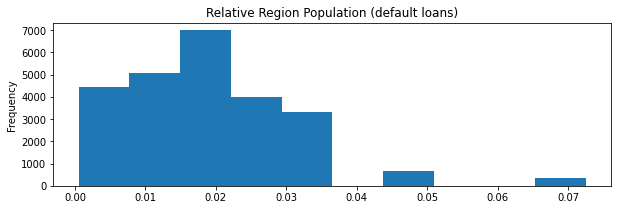

In [13]:
bar_plot = df[df['TARGET'] == 1]['REGION_POPULATION_RELATIVE'].plot.hist(title='Relative Region Population (default loans)', figsize=(10,3))
fig = bar_plot.get_figure()
fig.savefig('relative_pop.png')

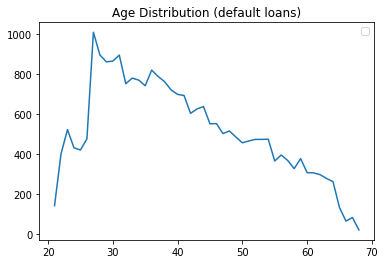

In [14]:
fig, ax = plt.subplots()
(df[df['TARGET'] == 1]['DAYS_BIRTH'].abs()//365).value_counts().to_frame().sort_index().plot(
    kind='line', 
    ax=ax, 
    title='Age Distribution (default loans)'
)

ax.legend([])
fig = fig.get_figure()


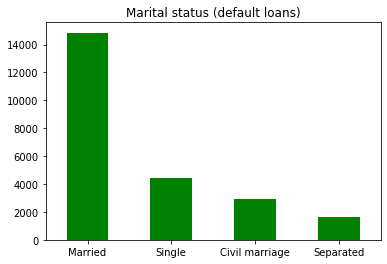

In [15]:
bar_plot = df[df['TARGET'] == 1]['NAME_FAMILY_STATUS'].replace('Single / not married', 'Single').value_counts()[:-1].plot.bar(
    color='green',
    title='Marital status (default loans)',
    rot=0
)
fig = bar_plot.get_figure()
fig.savefig('marital_default.png')

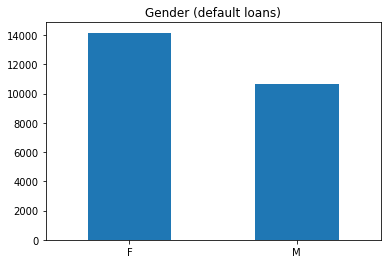

In [16]:
bar_plot = df[df['TARGET'] == 1]['CODE_GENDER'].value_counts().plot.bar(
    title='Gender (default loans)',
    rot=0
)
fig = bar_plot.get_figure()
fig.savefig('gender_default.png')

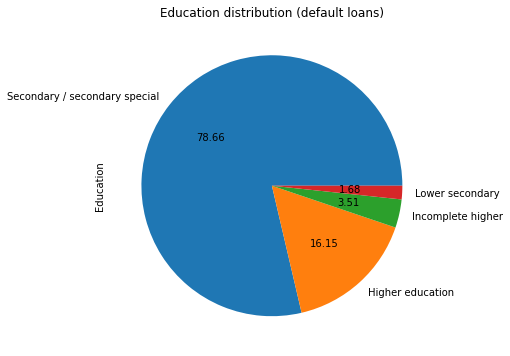

In [17]:
fig, ax = plt.subplots()
df[df['TARGET'] == 1].rename(columns={'NAME_EDUCATION_TYPE': "Education",})['Education'].value_counts()[:-1].plot(
    kind='pie',  
    fontsize=10,
     autopct='%.2f',
    figsize=(8,6),
    title='Education distribution (default loans)'
)
fig = fig.get_figure()


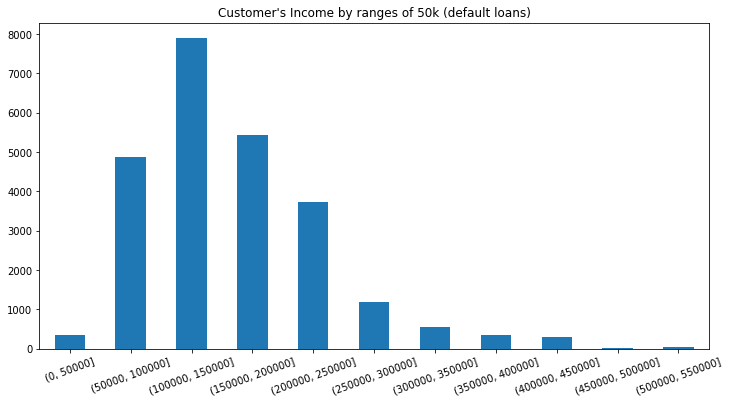

In [18]:
b_plot = df[df['TARGET'] == 1].groupby(pd.cut(df[df['TARGET'] == 1]['AMT_INCOME_TOTAL'], np.arange(0, 600_000, 50000))).sum()['TARGET'].plot.bar(
    rot=20,
    title="Customer's Income by ranges of 50k (default loans)",
    figsize=(12,6),
    xlabel=''
)
fig = b_plot.get_figure()
fig.savefig('income_graph.png')

In [19]:
percentage = 50
min_count =  int(((100 - percentage) / 100) * df.shape[0] + 1)
dropped_nans_df = df[df.columns[~df.columns.isin(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'])]].dropna(axis=1, thresh=min_count)
dropped_nans_df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].dropna()


apply_mean = lambda col: col.fillna(col.mean())
imputed_mean_num_df = dropped_nans_df.select_dtypes(include=[int, float]).abs().apply(apply_mean)
dropped_nans_df[imputed_mean_num_df.columns] = imputed_mean_num_df
dropped_nans_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000,0.083037,0.262949,0.139376
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.508071,0.529322,0.496702
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.508071,0.529322,0.496702
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974,0.508071,0.529322,0.496702
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.508071,0.529322,0.496702


In [20]:
print(dropped_nans_df.shape)
encoded_df = pd.get_dummies(dropped_nans_df)
encoded_df.head()

(307511, 82)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,9461.0,637.0,...,0,0,0,0,0,0,0,0,1,0
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765.0,1188.0,...,0,0,0,0,0,0,0,0,1,0
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,19046.0,225.0,...,0,0,0,0,0,0,0,0,0,0
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,19005.0,3039.0,...,0,0,0,0,0,0,0,0,0,0
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,19932.0,3038.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
encoded_df.loc[:, encoded_df.std() > .2]

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_XNA,EMERGENCYSTATE_MODE_No
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,9461.0,637.0,3648.0,...,0,0,0,0,1,1,0,0,0,1
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,16765.0,1188.0,1186.0,...,0,0,0,0,0,0,0,0,0,1
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,19046.0,225.0,4260.0,...,0,0,0,0,0,0,0,0,0,0
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,19005.0,3039.0,9833.0,...,0,0,0,0,1,1,0,0,0,0
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,19932.0,3038.0,4311.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251.0,0.0,0.0,157500.0,254700.0,27558.0,225000.0,9327.0,236.0,8456.0,...,0,0,1,0,0,0,0,0,0,1
307507,456252.0,0.0,0.0,72000.0,269550.0,12001.5,225000.0,20775.0,365243.0,4388.0,...,0,0,0,0,0,0,0,0,1,1
307508,456253.0,0.0,0.0,153000.0,677664.0,29979.0,585000.0,14966.0,7921.0,6737.0,...,0,0,1,0,0,0,0,0,0,1
307509,456254.0,1.0,0.0,171000.0,370107.0,20205.0,319500.0,11961.0,4786.0,2562.0,...,0,0,0,0,1,0,0,0,0,1


In [22]:
from scipy.stats import zscore
zscores = zscore(encoded_df)
abs_z_scores = np.abs(zscores)
filtered_entries = (abs_z_scores < 11).all(axis=1)
new_df = encoded_df[filtered_entries]
new_df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,9461.0,637.0,...,0,0,0,0,0,0,0,0,1,0
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765.0,1188.0,...,0,0,0,0,0,0,0,0,1,0
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,19046.0,225.0,...,0,0,0,0,0,0,0,0,0,0
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,19005.0,3039.0,...,0,0,0,0,0,0,0,0,0,0
5,100008.0,0.0,0.0,99000.0,490495.5,27517.5,454500.0,0.035792,16941.0,1588.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248.0,0.0,0.0,153000.0,331920.0,16096.5,225000.0,0.022625,16705.0,7258.0,...,0,0,0,0,0,0,0,0,0,0
307505,456249.0,0.0,0.0,112500.0,225000.0,22050.0,225000.0,0.022800,24384.0,365243.0,...,0,0,0,0,0,0,0,1,1,0
307507,456252.0,0.0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,20775.0,365243.0,...,0,0,0,0,0,0,0,1,1,0
307509,456254.0,1.0,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,11961.0,4786.0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
X = new_df[new_df.columns[~new_df.columns.isin(['TARGET', 'SK_ID_CURR'])]]
y = new_df['TARGET']


standardizer = StandardScaler()
X = standardizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [24]:
lg_model = LogisticRegression(solver='liblinear')
lg_model.fit(X_train, y_train)


y_pred = lg_model.predict(X_test)

In [25]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)
print('Accuracy of the binary classification = {:0.3f}'.format(accuracy_score(y_test, y_pred)))

True Positive(TP)  =  17
False Positive(FP) =  35
True Negative(TN)  =  69899
False Negative(FN) =  6174
Accuracy of the binary classification = 0.918


In [26]:
weights = lg_model.coef_[0]
abs_weights = np.abs(weights)


sorted_index = np.argsort(abs_weights)[::-1]



top_3 = sorted_index[:3]


print(list(new_df.iloc[:, top_3].columns))


['REGION_POPULATION_RELATIVE', 'ORGANIZATION_TYPE_Transport: type 4', 'AMT_CREDIT']
